# Introduction

In [ ]:
"""
What? Feature agglomeration

This code shows how similar features are merged together using feature agglomeration.

Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_agglomeration.html#sphx-glr-auto-examples-cluster-plot-digits-agglomeration-py
           https://scikit-learn.org/stable/modules/generated/sklearn.cluster.FeatureAgglomeration.html#sklearn.cluster.FeatureAgglomeration 
"""

# Import modules

In [7]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn import datasets, cluster
from sklearn.feature_extraction.image import grid_to_graph

# Load dataset

In [3]:
digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)

In [13]:
agglo = cluster.FeatureAgglomeration(connectivity=connectivity,
                                    n_clusters=32)
agglo.fit(X)
print("Original shape", X.shape)
X_reduced = agglo.transform(X)
print("Reduced shape", X_reduced.shape)

X_restored = agglo.inverse_transform(X_reduced)
images_restored = np.reshape(X_restored, images.shape)

Original shape (1797, 64)
Reduced shape (1797, 32)


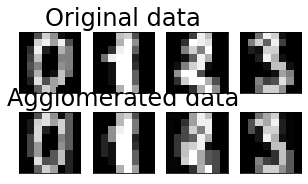

In [9]:
rcParams['font.size'] = 20
rcParams['figure.figsize'] = 17, 6
plt.figure(1, figsize=(4, 3.5))
plt.clf()
plt.subplots_adjust(left=.01, right=.99, bottom=.01, top=.91)
for i in range(4):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    if i == 1:
        plt.title('Original data')
    plt.subplot(3, 4, 4 + i + 1)
    plt.imshow(images_restored[i], cmap=plt.cm.gray, vmax=16,
               interpolation='nearest')
    if i == 1:
        plt.title('Agglomerated data')
    plt.xticks(())
    plt.yticks(())

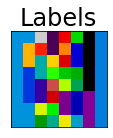

In [10]:
rcParams['font.size'] = 20
rcParams['figure.figsize'] = 17, 6
plt.subplot(3, 4, 10)
plt.imshow(np.reshape(agglo.labels_, images[0].shape),
           interpolation='nearest', cmap=plt.cm.nipy_spectral)
plt.xticks(())
plt.yticks(())
plt.title('Labels')
plt.show()